<a href="https://colab.research.google.com/github/JaperTai77/Colab-notebook/blob/main/hyperparameter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metrices

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer

In [ ]:
breast_cancer_X, breast_cancer_y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(breast_cancer_X)
y = pd.Series(breast_cancer_y).map({0:1, 1:0})

### Make own performance metric (grid search)

In [ ]:
def fnr(ytrue, ypred):
  yclass = np.where(ypred>0.5,1,0)
  tn,fp,fn,tp = confusion_matrix(ytrue,yclass,labels = [0,1]).ravel()
  FNR = fn/(tp+fn)
  return FNR

fnrScore = make_scorer(fnr,greater_is_better=False, 
                       needs_proba= True) # use probability

model = RandomForestClassifier(n_estimators=100, max_depth=1)
param = dict(n_estimators=[10, 50, 100, 500, 1000, ],
             max_depth=[1, 2, 3, 4])

In [ ]:
clf = GridSearchCV(model,param,
                   scoring=fnrScore,
                   cv=3)
search = clf.fit(X,y)
print(search.best_params_)

{'max_depth': 4, 'n_estimators': 100}


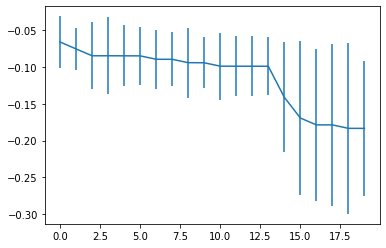

In [ ]:
result = pd.DataFrame(search.cv_results_)[['params','mean_test_score', 
                      'std_test_score']].sort_values(by='mean_test_score', ascending=False).reset_index()

result['mean_test_score'].plot(yerr=[result['std_test_score'], result['std_test_score']])

## Use performance metric from sklearn

In [ ]:
model = RandomForestClassifier(n_estimators=100, max_depth=1)
param = dict(n_estimators=[10, 50, 100, 500, 1000, ],
             max_depth=[1, 2, 3, 4])
clf = GridSearchCV(model,param,
                   scoring='roc_auc',
                   cv=3)
search = clf.fit(X,y)
print(search.best_params_)

{'max_depth': 4, 'n_estimators': 50}


In [ ]:
x = iter('Run')

In [ ]:
[i*2 for i in range(5) i>3]

SyntaxError: ignored

# Cross Validation

In [ ]:
from scipy.special import comb
from sklearn.model_selection import (
    KFold,
    RepeatedKFold,
    LeaveOneOut,
    LeavePOut,
    StratifiedKFold,
    cross_validate,
    train_test_split,
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### K-fold (and repeated)

In [ ]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(
    penalty ='l2', C=10, solver='liblinear')

k = KFold(n_splits=5, shuffle=True)
# for repeated K-f: rkf = RepeatedKFold(n_splits=5,n_repeats=10)

clf =  cross_validate(logit,X_train, y_train,
                      scoring='accuracy',
                      return_train_score=True,
                      cv=k)

clf['test_score']

array([1.        , 0.975     , 0.9125    , 0.89873418, 0.98734177])

In [ ]:
pd.DataFrame(clf).tail()

,fit_time,score_time,test_score,train_score
0,0.012977,0.001245,1.000000,0.965409
1,0.008771,0.001631,0.975000,0.968553
2,0.008235,0.001564,0.912500,0.974843
3,0.007948,0.001521,0.898734,0.981191
4,0.007916,0.001704,0.987342,0.971787


### Leave one out (and leave p out)

In [ ]:
l = LeaveOneOut()
# for leave p out: lp = LeavePOut(p=2)

clf =  cross_validate(logit,X_train, y_train,
                      scoring='accuracy',
                      return_train_score=True,
                      cv=l)
clf['test_score'].mean()

0.9547738693467337

In [ ]:
pd.DataFrame(clf).tail()

,fit_time,score_time,test_score,train_score
393,0.008901,0.001517,1.0,0.967254
394,0.009781,0.001570,1.0,0.967254
395,0.009870,0.001511,1.0,0.967254
396,0.009444,0.001573,1.0,0.967254
397,0.009192,0.001558,1.0,0.967254


### Stratified K-Fold

only for classification and imbalanced data

In [ ]:
sk = StratifiedKFold(n_splits=5, shuffle=True)
clf =  cross_validate(logit,X_train, y_train,
                      scoring='accuracy',
                      return_train_score=True,
                      cv=sk)
clf['test_score']

array([0.9       , 0.975     , 0.9625    , 0.94936709, 0.92405063])

In [ ]:
pd.DataFrame(clf).tail()

,fit_time,score_time,test_score,train_score
0,0.013335,0.001472,0.900000,0.974843
1,0.007782,0.001591,0.975000,0.974843
2,0.009041,0.001967,0.962500,0.974843
3,0.009002,0.001575,0.949367,0.978056
4,0.008946,0.001654,0.924051,0.984326


# Cross Validation with Grid Search

### Repeated K-fold

In [ ]:
logit = LogisticRegression(penalty ='l2', C=1, solver='liblinear',max_iter=10000)
param_grid = dict(penalty=['l1', 'l2'],C=[0.1, 1, 10],)
rkf = RepeatedKFold(n_splits=5,n_repeats=10)

clf =  GridSearchCV(
    logit,
    param_grid,
    scoring='accuracy',
    cv=kf, 
    refit=True)

search = clf.fit(X_train, y_train)
search.best_params_

{'C': 10, 'penalty': 'l1'}

In [ ]:
pd.DataFrame(search.cv_results_)[['params', 'mean_test_score', 'std_test_score']]

,params,mean_test_score,std_test_score
0,"{'C': 0.1, 'penalty': 'l1'}",0.924684,0.019329
1,"{'C': 0.1, 'penalty': 'l2'}",0.944715,0.015146
2,"{'C': 1, 'penalty': 'l1'}",0.954778,0.012744
3,"{'C': 1, 'penalty': 'l2'}",0.957342,0.012624
4,"{'C': 10, 'penalty': 'l1'}",0.964842,0.016560
5,"{'C': 10, 'penalty': 'l2'}",0.957278,0.010051


### Leave P out

In [ ]:
logit = LogisticRegression(penalty ='l2', C=1, solver='liblinear',max_iter=10000)
param_grid = dict(penalty=['l1', 'l2'],C=[0.1, 1, 10],)
lp = LeavePOut(p=2)

clf =  GridSearchCV(
    logit,
    param_grid,
    scoring='accuracy',
    cv=lp, 
    refit=True)

search = clf.fit(X_train, y_train)
search.best_params_

In [ ]:
pd.DataFrame(search.cv_results_)[['params', 'mean_test_score', 'std_test_score']]